In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install yolov7-package
!pip install tensorboard
#!pip install wandb

In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/Capstone/pycode"
sys.path.append(py_file_location)#os.path.abspath(py_file_location))

py_file_location = "/content/drive/MyDrive/Capstone/pycode/yolov7"
sys.path.append(py_file_location)#os.path.abspath(py_file_location))

py_file_location = "/content/drive/MyDrive/Capstone/pycode/utilities"
sys.path.append(py_file_location)#os.path.abspath(py_file_location))


In [ ]:
#from train import *
from bdd100k_prepare_dataset import *
import bdd100k_config
from utils import *
import yaml
import argparse
import shutil
import os
from PIL import Image
import random
import torch

**Step1**
1. Parse 100k labels json file and extract annotations for each image, convert into Yolo format.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. One text fille for each image by annotating each object
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. Each line format is imageclassid,x1,y1,x2,y2, represents one object in image
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ex: if image contains two cars, one person and one truck, file will contain four rows
2. Create dataset folder structure
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;i. dataset=>bdd100k=>images=>train,test,val
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ii. dataset=>bdd100k=>labels=>train,test,val

In [ ]:
ROOT_DIR = '/content/drive/MyDrive'
CLASS_LABELS = {'car': 0,
                'bus': 1,
                'person': 2,
                'bike': 3,
                'truck': 4,
                'motor': 5,
                'train': 6,
                'rider': 7,
                'traffic sign': 8,
                'traffic light': 9}
IMAGE_SIZE =(1280,720)

In [ ]:
# BDD_LABEL_JSON_FILE_PATH_TRAIN = ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json'
# YOLO_LABEL_FILE_SAVE_PATH_TRAIN = ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_yolo_labels/train'

# bdd100klabeltoYOLOlabelformat(BDD_LABEL_JSON_FILE_PATH_TRAIN,YOLO_LABEL_FILE_SAVE_PATH_TRAIN,IMAGE_SIZE,CLASS_LABELS,sample_size=1000)

  1%|▏         | 999/69863 [04:42<5:25:03,  3.53it/s]


In [ ]:
# from google.colab import files
# files.download(YOLO_LABEL_FILE_SAVE_PATH_TRAIN+"/"+ annotation_file)
# files.download(IMAGE_PATH+"/"+annotation_file.replace("labels", "images").replace("txt", "jpg"))

In [ ]:
# BDD_LABEL_JSON_FILE_PATH_VAL = ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json'
# YOLO_LABEL_FILE_SAVE_PATH_VAL = ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_yolo_labels/val'

# bdd100klabeltoYOLOlabelformat(BDD_LABEL_JSON_FILE_PATH_VAL,YOLO_LABEL_FILE_SAVE_PATH_VAL,IMAGE_SIZE,CLASS_LABELS,sample_size=500)

  5%|▍         | 499/10000 [02:18<43:50,  3.61it/s]


In [ ]:
# print("Train samples....")
# preparesampleimgandlabels(
#               img_source_path=ROOT_DIR+'/Capstone/bdd100k/bdd100k_images_100k/bdd100k/images/100k/train',
#               label_source_path=ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_yolo_labels/train',
#               image_dest_path=ROOT_DIR+'/Capstone/dataset/bdd100k/images/train',
#               label_dest_path=ROOT_DIR+'/Capstone/dataset/bdd100k/labels/train',
#               sample_size=10
#               )

# print("Validation samples....")
# preparesampleimgandlabels(
#               img_source_path=ROOT_DIR+'/Capstone/bdd100k/bdd100k_images_100k/bdd100k/images/100k/val',
#               label_source_path=ROOT_DIR+'/Capstone/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_yolo_labels/val',
#               image_dest_path=ROOT_DIR+'/Capstone/dataset/bdd100k/images/val',
#               label_dest_path=ROOT_DIR+'/Capstone/dataset/bdd100k/labels/val',
#               sample_size=10
#               )

# print("Test samples....")
# preparesampleimgandlabels(
#               img_source_path=ROOT_DIR+'/Capstone-ImageTagging/bdd100k/bdd100k_images_100k/bdd100k/images/100k/test',
#               label_source_path=ROOT_DIR+'/Capstone-ImageTagging/bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_yolo_labels/test',
#               image_dest_path=ROOT_DIR+'/Capstone-ImageTagging/dataset/bdd100k/images/test',
#               label_dest_path=ROOT_DIR+'/Capstone-ImageTagging/dataset/bdd100k/labels/test',
#               sample_size=10
#               )

Train samples....
Copying images and labels...
Total samples created -  10
Validation samples....
Copying images and labels...
Total samples created -  10


In [ ]:
# #Test annotations
# LABEL_PATH = ROOT_DIR+'/Capstone-ImageTagging/dataset/bdd100k/labels/train'
# annotation_file=random.choice(os.listdir(LABEL_PATH))
# print(annotation_file)
# with open(LABEL_PATH+"/"+ annotation_file, "r") as file:
#     annotation_list = file.read().split("\n")[:-1]
#     print("Total annotations - ",len(annotation_list))
#     annotation_list = [x.split(" ") for x in annotation_list]
#     annotation_list = [[float(y) for y in x] for x in annotation_list]

# CLASS_ID_TO_NAMES = dict(zip(CLASS_LABELS.values(), CLASS_LABELS.keys()))

# image_file = LABEL_PATH.replace("labels", "images")+"/"+annotation_file.replace("txt", "jpg")
# image = Image.open(image_file)
# # Plot the Bounding Box
# plot_boundingbox_annotations(image, annotation_list,CLASS_ID_TO_NAMES)

**Step2**
Download YoloV7 model and configure files. Yaml format is used for configuration
1. road_object_detection.yaml - Dataset Coniguration. No.of classes, class names, train/test/val image paths
2. hyperparms.yaml - Initial hyper parameter setup. lr,momentum etc.,
3. opt.yaml - epcohs,batch size, image size, workers etc.
4. yolov7.yaml - Yolo CNN architecture
5. yolov7.pt

Note:
1. Freeze all layers initially and observe performance.
2. Unfreeze backbone and observe performace
3. Unfreeze top layers along with backbone and observe performance
<br>(This means training from scratch)


In [ ]:

OPT_FILE_PATH =ROOT_DIR+'/Capstone/config/opt.yaml'

HYP_FILE_PATH=ROOT_DIR+'/Capstone/config/hyp.yaml'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
with open(OPT_FILE_PATH) as f:
  opt_params = yaml.load(f, Loader=yaml.SafeLoader)

with open(HYP_FILE_PATH) as f:
  hyp_params = yaml.load(f, Loader=yaml.SafeLoader)

In [ ]:
parser = argparse.ArgumentParser()
for (key,value) in opt_params.items():
  parser.add_argument('--'+key,default=value)
opt_dict = parser.parse_args(args=[])
opt_dict.epochs = 2
opt_dict.batch_size = 8

**Step3**
1. Train the model with bdd100k images data set
2. Call **train.py\train** method to train the model
3. Observe loss and accuracy
4. Finetune
5. Save the model weights

In [ ]:
#rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
#train(hyp_params,opt_dict,device)

wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)
/content/drive/MyDrive/Capstone/config/yolov7.pt
/content/drive/MyDrive/Capstone/dataset/bdd100k/images/train/
/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/train.cache


train: Scanning '/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/train' images and labels... 10 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


/content/drive/MyDrive/Capstone/dataset/bdd100k/images/val/
/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/val.cache


val: Scanning '/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/val' images and labels... 10 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 10/10 [00:13<00:00,  1.36s/it]



autoanchor: Analyzing anchors... anchors/target = 2.98, Best Possible Recall (BPR) = 0.9757. Attempting to improve anchors, please wait...
autoanchor: WARNING: Extremely small objects found. 1 of 206 labels are < 3 pixels in size.
autoanchor: Running kmeans for 9 anchors on 206 points...
autoanchor: thr=0.25: 1.0000 best possible recall, 4.80 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.323/0.756-mean/best, past_thr=0.491-mean: 8,8,  16,9,  9,17,  26,19,  14,37,  48,26,  60,53,  100,83,  166,143


autoanchor: Evolving anchors with Genetic Algorithm: fitness = 0.7686: 100%|██████████| 1000/1000 [00:00<00:00, 2809.36it/s]


autoanchor: thr=0.25: 1.0000 best possible recall, 5.00 anchors past thr
autoanchor: n=9, img_size=640, metric_all=0.330/0.769-mean/best, past_thr=0.492-mean: 6,6,  10,8,  8,15,  22,16,  14,34,  37,22,  58,51,  105,80,  166,135
autoanchor: New anchors saved to model. Update model *.yaml to use these anchors in the future.



       0/1     1.08G    0.1018   0.04048   0.06573     0.208        48       640: 100%|██████████| 2/2 [00:23<00:00, 11.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


                 all          10           0           0           0           0           0


       1/1     6.97G    0.1007   0.04704   0.06571    0.2134       143       640: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


                 all          10           0           0           0           0           0
Optimizer stripped from runs\train\exp/weights/last.pt, 74.9MB
Optimizer stripped from runs\train\exp/weights/best.pt, 74.9MB


(0.0,
 0.0,
 0.0,
 0.0,
 0.14594200253486633,
 0.057384002953767776,
 0.07315796613693237)

In [ ]:
import argparse
import logging
import math
import os, sys
import random
import time
from copy import deepcopy
from pathlib import Path
from threading import Thread
import numpy as np
import torch.distributed as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data
import yaml
from torch.cuda import amp
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

import yolotest
import test  # import test.py to get mAP after each epoch
from models.experimental import attempt_load
from models.yolo import Model
from utils.autoanchor import check_anchors
from utils.datasets import create_dataloader
from utils.general import labels_to_class_weights, increment_path, labels_to_image_weights, init_seeds, \
    fitness, strip_optimizer, get_latest_run, check_dataset, check_file, check_git_status, check_img_size, \
    check_requirements, print_mutation, set_logging, one_cycle, colorstr
from utils.google_utils import attempt_download
from utils.loss import ComputeLoss, ComputeLossOTA
from utils.plots import plot_images, plot_labels, plot_results, plot_evolution
from utils.torch_utils import ModelEMA, select_device, intersect_dicts, torch_distributed_zero_first, is_parallel
from utils.wandb_logging.wandb_utils import WandbLogger, check_wandb_resume

In [ ]:
train_path = '/content/drive/MyDrive/Capstone/dataset/bdd100k/images/train/'
val =  '/content/drive/MyDrive/Capstone/dataset/bdd100k/images/val/'
# test: /content/drive/MyDrive/Capstone/dataset/bdd100k/images/test/
NUM_CLASSES = 10  # Number of classes in your dataset
CLASS_NAMES = ["car", "bus", "person", "bike", "truck", "motor", "train", "rider", "traffic sign", "traffic light"]
BATCH_SIZE=16
MAX_STRIDE = 32
EPOCHS=10
imgsz, imgsz_test = [check_img_size(x, MAX_STRIDE) for x in opt_dict.img_size]

In [ ]:
dataloader, dataset = create_dataloader(train_path, imgsz, BATCH_SIZE, MAX_STRIDE, opt_dict,hyp_params)

/content/drive/MyDrive/Capstone/dataset/bdd100k/images/train/
/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/train.cache


Scanning '/content/drive/MyDrive/Capstone/dataset/bdd100k/labels/train.cache' images and labels... 10 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 10/10 [00:00<?, ?it/s]


In [ ]:
weights = torch.load(opt_dict.weights, map_location=device)  # pretrained weights
model = Model(opt_dict.cfg or weights['model'].yaml, ch=3, nc=NUM_CLASSES)
#model.hyp = hyp_params  # attach hyperparameters to model
model = weights['model'].float()

for k, v in model.named_parameters():
    v.requires_grad = True  # train all layers

optimizer = optim.SGD(model.parameters(), lr=hyp_params['lr0'], momentum=hyp_params['momentum'], nesterov=True)
model = model.to(device)

In [ ]:
def train(model, device, data_loader, optimizer, criterion):
    model.train()
    # Model parameters
    nc = NUM_CLASSES
    nl = model.model[-1].nl
    hyp_params['box'] *= 3. / nl  # scale to layers
    hyp_params['cls'] *= nc / 80. * 3. / nl  # scale to classes and layers
    hyp_params['obj'] *= (imgsz / 640) ** 2 * 3. / nl  # scale to image size and layers
    #hyp_params['label_smoothing'] = opt.label_smoothing

    mlc = np.concatenate(dataset.labels, 0)[:, 0].max()  # max label class    pbar = enumerate(dataloader)
    model.nc = nc
    model.gr = 1.0  # iou loss ratio (obj_loss = 1.0 or iou)
    model.class_weights = labels_to_class_weights(dataset.labels, nc).to(device) * nc  # attach class weights
    model.names = CLASS_NAMES
    nb = len(dataloader)
    # lf = one_cycle(1, hyp['lrf'], epochs)
    # scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)
    start_epoch = 1
    # scheduler.last_epoch = start_epoch - 1  # do not move
    scaler = amp.GradScaler(enabled=device)
    model.hyp = hyp_params  # attach hyperparameters to model
    criterian = ComputeLoss(model)  # loss function
    optimizer.zero_grad()
    for epoch in range(1,EPOCHS+1):
      #pbar = tqdm(enumerate(dataloader), total=len(dataloader))
      for i, (imgs, targets, paths, _) in enumerate(dataloader):  # batch -------------------------------------------------------------
        print("epoch - {}, batch {}".format(epoch,i+1))
        imgs = imgs.to(device).float() / 255.0  # uint8 to float32, 0-255 to 0.0-1.0
        optimizer.zero_grad()
        pred = model(imgs)  # forward
        loss, loss_items = criterian(pred, targets.to(device))
        loss.backward()
        optimizer.step()
        # scaler.scale(loss).backward()
        # scaler.step(optimizer)  # optimizer.step
        # scaler.update()
        #print(loss_items/len(dataloader))
        #mloss = (mloss * i + loss_items) / (i + 1)  # update mean losses
    torch.save({'model': deepcopy(model)}, '/content/drive/MyDrive/Capstone/evaluation/final_model0.pt')

In [ ]:
train(model, device, dataloader, optimizer, None)

epoch - 1, batch 1
tensor([2.39201e-02, 1.58677e-02, 4.85063e-19, 3.97878e-02], device='cuda:0')
epoch - 2, batch 1
tensor([2.56470e-02, 1.63443e-02, 4.86068e-19, 4.19913e-02], device='cuda:0')
epoch - 3, batch 1
tensor([2.75298e-02, 1.71761e-02, 4.87112e-19, 4.47059e-02], device='cuda:0')
epoch - 4, batch 1
tensor([2.86846e-02, 1.77069e-02, 4.88312e-19, 4.63916e-02], device='cuda:0')
epoch - 5, batch 1
tensor([2.43724e-02, 1.55892e-02, 4.87465e-19, 3.99616e-02], device='cuda:0')
epoch - 6, batch 1
tensor([2.53438e-02, 1.58322e-02, 4.88245e-19, 4.11760e-02], device='cuda:0')
epoch - 7, batch 1
tensor([2.83549e-02, 1.78375e-02, 4.88697e-19, 4.61923e-02], device='cuda:0')
epoch - 8, batch 1
tensor([2.53233e-02, 1.58970e-02, 4.89935e-19, 4.12203e-02], device='cuda:0')
epoch - 9, batch 1
tensor([2.78967e-02, 1.70977e-02, 4.89887e-19, 4.49944e-02], device='cuda:0')
epoch - 10, batch 1
tensor([2.78708e-02, 1.80837e-02, 4.89919e-19, 4.59545e-02], device='cuda:0')


In [ ]:
model_train(hyp_params,opt_dict,device)

**Model Evaluation**

In [ ]:
from evaluate import evaluate
from google.colab.patches import cv2_imshow

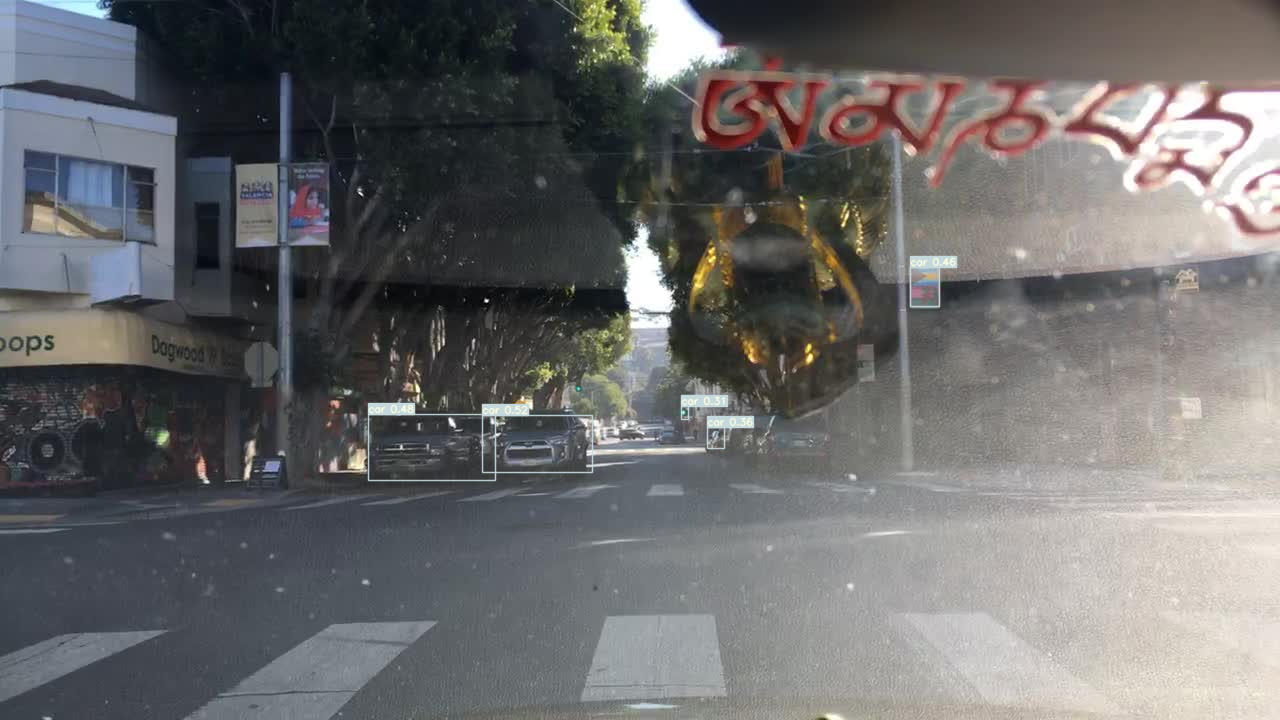

In [ ]:
EVAL_WEIGHT_FILE = '/content/drive/MyDrive/Capstone/evaluation/final_model0.pt'
class_indicies = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
TEST_IMG_PATH = '/content/drive/MyDrive/Capstone/bdd100k/bdd100k_images_100k/bdd100k/images/100k/test'
test_img = random.choice(os.listdir(TEST_IMG_PATH))
opt_dict.img_size = 640
evaluate(opt_dict,hyp_params,10,class_indicies,EVAL_WEIGHT_FILE,TEST_IMG_PATH,test_img, device)

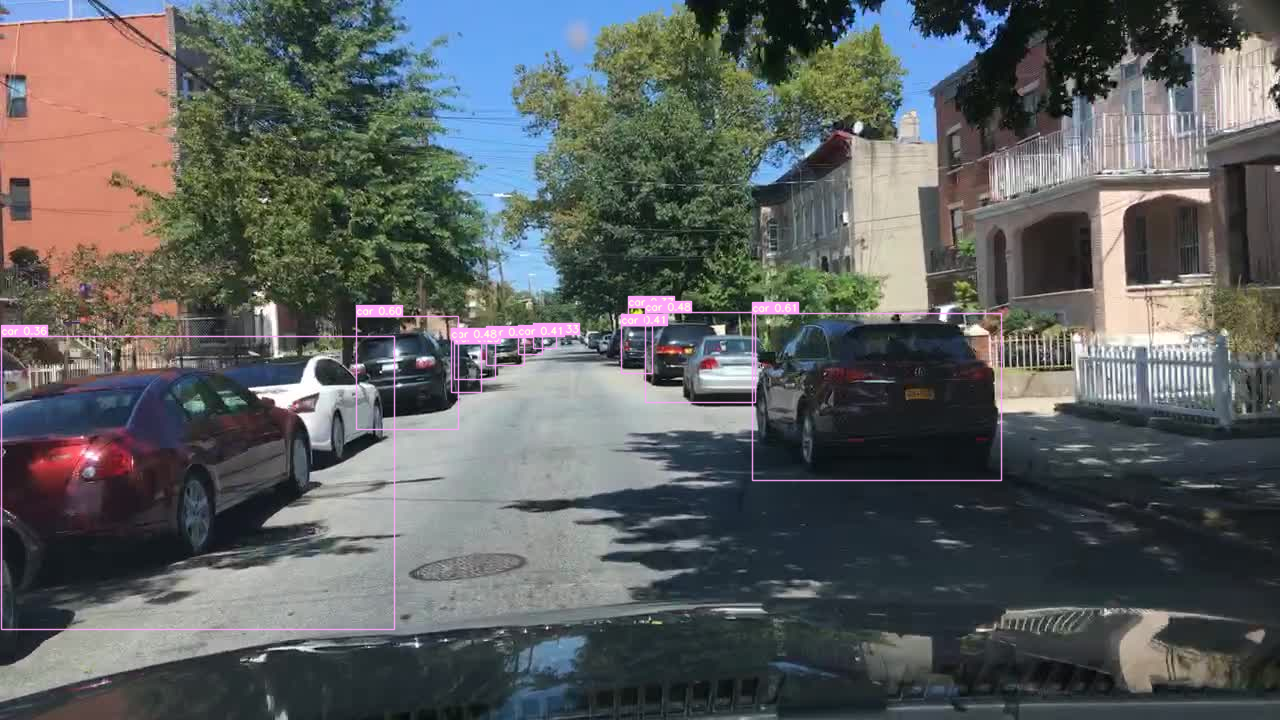

In [ ]:
test_img = random.choice(os.listdir(TEST_IMG_PATH))
opt_dict.img_size = 640
evaluate(opt_dict,hyp_params,10,class_indicies,EVAL_WEIGHT_FILE,TEST_IMG_PATH,test_img, device)